## import libararies

In [124]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

1.12.0


## Import the Fashion MNIST dataset

In [125]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

## adding class names in datasets

In [126]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## data exploration

### train datasets exploration

In [127]:
train_images.shape

(60000, 28, 28)

In [128]:
len(train_labels)

60000

In [129]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### test datasets exploration

In [130]:
test_images.shape

(10000, 28, 28)

In [131]:
len(test_labels)

10000

## Preprocess the data

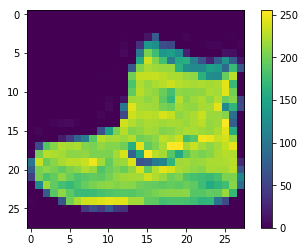

In [132]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Scaling of datasets

In [133]:
train_images=train_images/255.0
test_images=test_images/255.0

### display of 25 images datasets

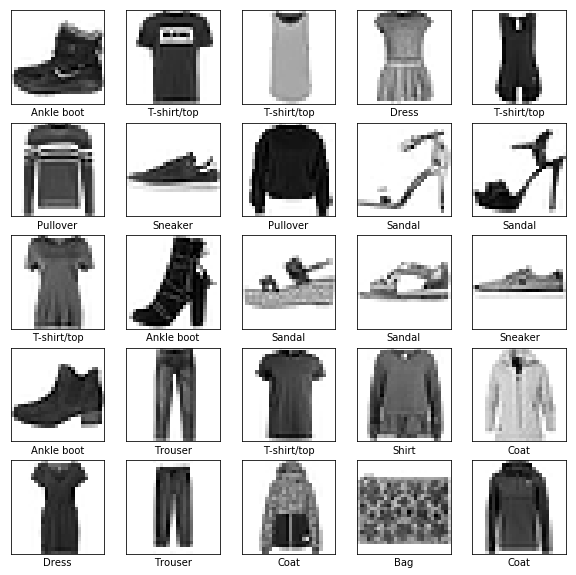

In [134]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## build the model

### set up the layers(network)

In [135]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation=tf.nn.relu),
    keras.layers.Dense(10,activation=tf.nn.softmax)
    
])

## Compile the model

In [136]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']

)

## Train the model

In [137]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 132us/step - loss: 0.4948 - acc: 0.8260
Epoch 2/5
60000/60000 [==============================] - 6s 105us/step - loss: 0.3711 - acc: 0.8664
Epoch 3/5
60000/60000 [==============================] - 6s 95us/step - loss: 0.3338 - acc: 0.8794
Epoch 4/5
60000/60000 [==============================] - 6s 96us/step - loss: 0.3111 - acc: 0.8853
Epoch 5/5
60000/60000 [==============================] - 9s 147us/step - loss: 0.2943 - acc: 0.8924


## Evaluate accuracy

In [138]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print("test accuracy :",test_acc)

10000/10000 [==============================] - 1s 68us/step
test accuracy : 0.8762


## Make predictions

In [139]:
predictions=model.predict(test_images)

In [140]:
predictions[0]

array([2.30117635e-07, 2.32952235e-08, 2.25839216e-07, 1.12357206e-07,
       2.44172838e-06, 4.24398249e-03, 2.29207180e-05, 2.75868382e-02,
       6.43577587e-05, 9.68078911e-01], dtype=float32)

In [141]:
np.argmax(predictions[0])

9

So the model is most confident that this image is an ankle boot, or class_names[9].


In [142]:
test_labels[0]

9

after checking test label ,we finally knew the result is correct

## plotting

In [143]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Let's look at the 0th image, predictions, and prediction array.

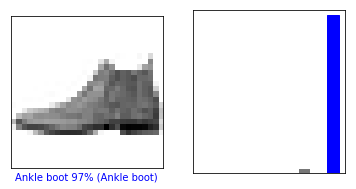

In [145]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions,test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions,test_labels)
plt.show()


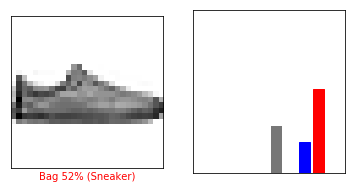

In [146]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

Let's plot several images with their predictions. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percent (out of 100) for the predicted label. Note that it can be wrong even when very confident.

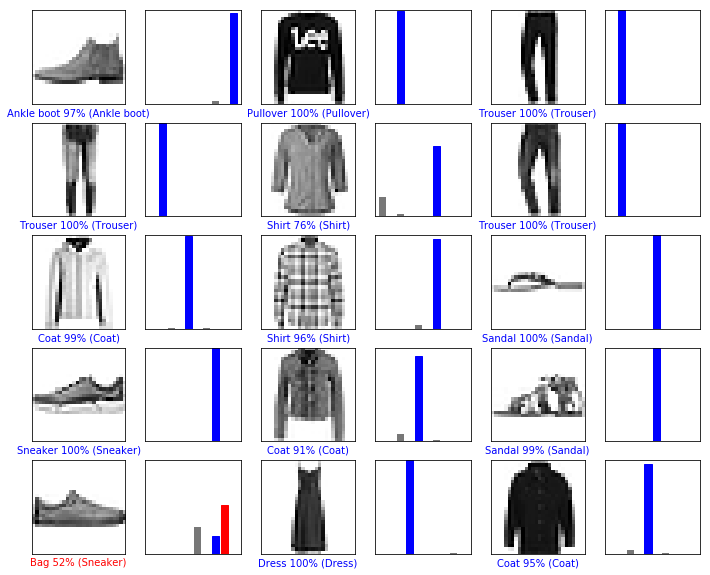

In [147]:
n_row=5
n_col=3
num_images=n_row*n_col
plt.figure(figsize=(2*2*n_col,2*n_row))
for i in range(num_images):
    plt.subplot(n_row,2*n_col,2*i+1)
    plot_image(i,predictions,test_labels,test_images)
    plt.subplot(n_row,2*n_col,2*i+2)
    plot_value_array(i,predictions,test_labels)
plt.show()

Finally, use the trained model to make a prediction about a single image.

In [159]:
# Grab an image from the test dataset
img = test_images[3]

print(img.shape)

(28, 28)


In [160]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [161]:
predictions_single = model.predict(img)

print(predictions_single)

[[4.2168402e-08 9.9999750e-01 7.8662437e-09 2.4731344e-06 3.4411137e-08
  3.3741695e-16 1.3042945e-08 3.5423635e-16 9.2664729e-09 1.2499272e-14]]


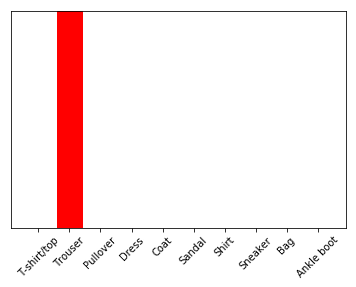

In [162]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

model.predict returns a list of lists, one for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [163]:
np.argmax(predictions_single[0])

1